In [164]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as con

sys.path.append('/Users/jordanlee/Projects/SummerProject/ParticleSwarm')

import pso as pso

In [165]:
def BraninHoo(X):

    x1 = X[:, 0]
    x2 = X[:, 1]
    
    # Calculate the function value
    y = (x2 - (5.1 / (4 * np.pi ** 2)) * x1 ** 2 + (5 / np.pi) * x1 - 6) ** 2
    y += 10 * (1 - (1 / (8 * np.pi))) * np.cos(x1) + 10

    # Add the constraint
    constraint = (x1 - 2.5) ** 2 + (x2 - 7.5) ** 2 - 50 >= 0
    y[constraint] = 200  # Apply penalty for constraint violation
        
    # Make function negative to find the minimum
    y = -y.reshape(-1,1)

    return y

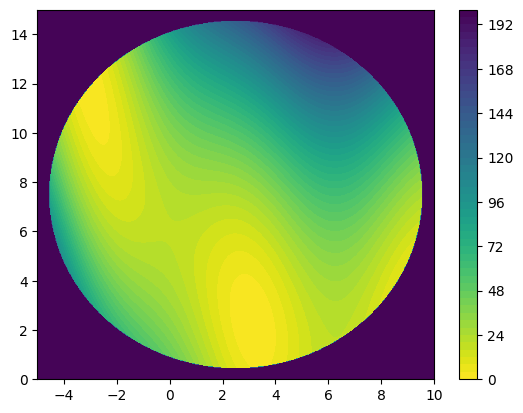

In [166]:
X1 = np.linspace(-5, 10, 501, endpoint=True)
X2 = np.linspace(0, 15, 501, endpoint=True)

# Create the meshgrid
X1_grid, X2_grid = np.meshgrid(X1, X2)

# Combine the grid into an n**2 x 2 matrix
candidate_x = np.c_[X1_grid.ravel(), X2_grid.ravel()]

result = -BraninHoo(candidate_x).reshape(X1_grid.shape)

# Plot the contour
contour = plt.contourf(X1, X2, result, levels=50, cmap='viridis_r')

# Add a color bar
plt.colorbar(contour)

# Show the plot
plt.show()

In [167]:
number_of_particles = 4
bounds = np.array([[-5, 10], [0, 15]])

species_1_hyperparameters = [0.6, 0.3, 0.5, 0]
species_2_hyperparameters = [0, 0, 0, 1]

iterations = 50

hyper_parameter_sets = np.array([species_1_hyperparameters, species_2_hyperparameters])

species_probabilities = np.array([1.0, 0.])

velocity_threshold = 1 / np.e**3
# velocity_threshold = 0
velocity_boost = 1 / np.e

In [168]:
optimiser = pso.PSO(bounds, number_of_particles, hyper_parameter_sets, species_probabilities, velocity_threshold, velocity_boost, maximise=True)
optimiser.InitialiseSwarm()

iterations = 65
for i in range(iterations):
    X = optimiser.GetNextX()
    Y = BraninHoo(X)
    optimiser.UpdateOptimiser(Y)

optimiser.swarm.global_max, optimiser.swarm.global_max_position

(-0.47111960997892777, array([-3.04770243, 11.87459976]))

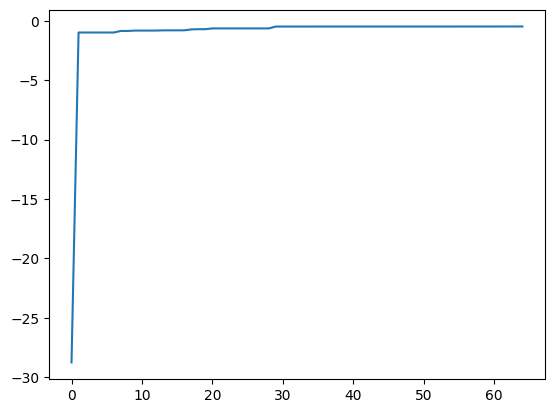

In [169]:
plt.plot(optimiser.swarm.global_max_history)

Text(0.5, 0, 'Iteration #')

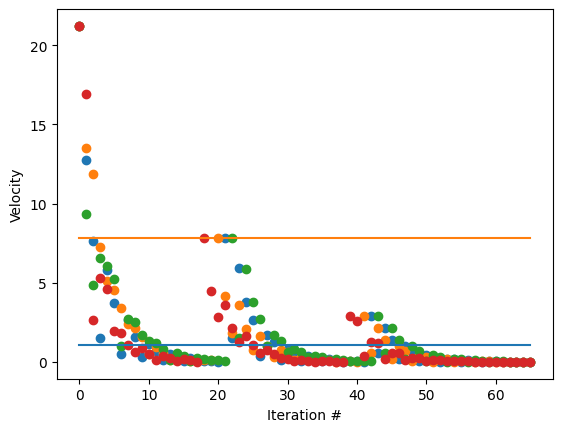

In [170]:
for particle in optimiser.swarm.particles:
    plt.scatter(range(optimiser.iteration + 1), np.linalg.norm(particle.velocity_history, axis=1))

plt.plot([0, iterations], [np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e**3, np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e**3])
plt.plot([0, iterations], [np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e, np.linalg.norm(particle.velocity_history, axis=1)[0]/ np.e])

plt.ylabel('Velocity')
plt.xlabel('Iteration #')

In [171]:
"""
For faster benchmarking:
"""

optimum = []
optimum_location = []

for i in range(1000):
    optimiser = pso.PSO(bounds, number_of_particles, hyper_parameter_sets, species_probabilities, velocity_threshold, velocity_boost, maximise=True)
    optimiser.InitialiseSwarm()

    for i in range(iterations - 1):
        X = optimiser.GetNextX()
        Y = BraninHoo(X)
        optimiser.UpdateOptimiser(Y)

    optimum.append(optimiser.swarm.global_max)
    optimum_location.append(optimiser.swarm.global_max_position)
    
np.mean(optimum), np.mean(optimum_location, axis=0)

(-0.4833242828930294, array([1.34485794, 5.11261513]))